# Topic sentiments and positions


In [18]:
import numpy as np
import pandas as pd

df = pd.read_csv('/Users/Rudra/Desktop/python/NLP/Reddit Data/reddit_worldnews_start_to_2016-11-22.csv')

In [19]:
df.head()

,Itime_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [20]:

from nltk.corpus import stopwords
import string ### this is awesome ! 

stopwords = set(stopwords.words('english'))
#best_titles has only the most up votes news articles ( TOP 10 )
best_titles = df.sort_values(by='up_votes', ascending=False)['title'][:10]


In [21]:
from nltk import word_tokenize
# removes all the stopwords 
# NOTE : converted to set and removed everything
best_words = set(np.concatenate([word_tokenize(t) for t in best_titles])) - stopwords
#convert to lower case
best_words = {word.lower() for word in best_words}
#remove punctuations and digits
best_words = best_words - 
- set(string.digits)
# function to remove float numbers
def is_float(s):
    try : 
        float(s)
        return True 
    except ValueError:
        return False
    
# removes all float and "'" 
#best_words = [ word for word in best_words if (not is_float(word) and word != "'")]
best_words = {word for word in best_words if not is_float(word)}
best_words = {word for word in best_words if "'" not in word}

In [22]:
#worldnews['down_votes'].value_counts() Counts the type of words and count
#print df[df['title'].map(lambda title: 'company' in title)]

pd.Series(index=list(best_words), data=[(df[df['title'].map(lambda title: word in title)]['up_votes'].mean(),
                                             df[df['title'].map(lambda title: word in title)]['up_votes'].count())
                                            for word in list(best_words)])

fifa                            (nan, 0)
managed             (565.482993197, 147)
chinese              (16.0238095238, 42)
produces             (324.358974359, 78)
criminally           (1089.89473684, 19)
global             (181.902495647, 3446)
celebrities           (333.87037037, 54)
month              (187.717708333, 4800)
discovered         (328.214105793, 1191)
held               (100.907629148, 2923)
manages                     (755.44, 25)
radio               (173.828442438, 886)
seaweed              (1387.45454545, 11)
horns                (481.208333333, 72)
one-eighth                  (21253.0, 1)
contributions        (519.136363636, 44)
unto                 (293.686868687, 99)
adding              (196.943965517, 232)
feeding             (205.651006711, 149)
police            (130.932836453, 11807)
paris                (208.04516129, 155)
smugglers           (151.798245614, 228)
location            (221.601542416, 389)
tweets                     (200.68, 250)
thousands       

In [23]:
# Tokenizes the words in the title and then adds it as a column in the df


words_tokenized = [[(w.lower()) for w in word_tokenize(t.decode('utf-8'))] for t in df['title']]


In [24]:
# adding a column
df['tokenized_title'] = words_tokenized


In [25]:
all_words = pd.Series(np.concatenate(words_tokenized)).value_counts()


In [26]:
#get all the words that arent the regular stop words,punctuations, etc
all_words = all_words[[word not in stopwords and word not in string.punctuation and
                       word not in string.digits and not is_float(word)
                       and word!= "'" for word in all_words.index]]
                        

In [27]:
%matplotlib inline

In [28]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

# To increase the accuracy of any models that we build let's do one more thing, let's stem our words: 
# mapping "says" and "saying" and "said" all to "say", for example, because they are all really the same 
# one word in different forms. We'll use the nltk built-in PorterStemmer for this.
all_words.index = [stemmer.stem(w) for w in all_words.index]

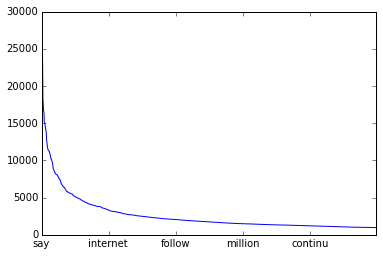

In [29]:
all_words[:1000].plot()

In [30]:
all_stems = all_words.groupby(by=all_words.index).sum().sort_values(ascending=False)

In [31]:
all_stems[:10].index

Index([u'say', u'kill', u'china', u'us', u'new', u'attack', u'syria',
       u'russia', u'world', u'polic'],
      dtype='object')

In [33]:
df['stemmed_title'] = df['tokenized_title'].map(
    lambda wl: [stemmer.stem(w) for w in wl]
)

# Adjustment for Growth


In [36]:
date_lookup = df.groupby('date_created')['up_votes'].median()


date_created
2008-01-25    3.0
2008-01-28    2.0
2008-01-29    3.0
2008-01-30    4.0
2008-01-31    3.0
Name: up_votes, dtype: float64


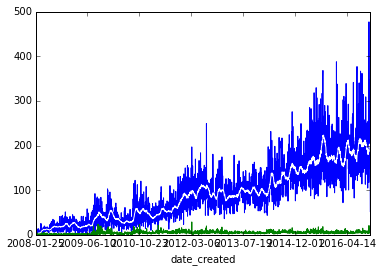

In [41]:
df.groupby('date_created')['up_votes'].mean().plot()
df.groupby('date_created')['up_votes'].median().plot()
df.groupby('date_created')['up_votes'].mean().rolling(window=31).mean().plot(color='white')


# Need to ask Shiva about this !! 

# Popular Topics

In [42]:
from nltk import pos_tag

In [46]:
pos_tag(df['tokenized_title'][0])

(u'killed', 'VBN')

In [53]:
df['pos_title'] = df['tokenized_title'].map(lambda t: [t[1] for t in pos_tag(t)])

In [54]:
df['pos_title'].head()

0                   [NNS, VBN, IN, NN, NNS]
1                        [NN, VBZ, VBG, NN]
2                [PRP, VBZ, NN, IN, NN, NN]
3           [JJ, NN, :, JJ, NN, NN, TO, DT]
4    [NN, IN, NN, NNS, VBP, CC, JJ, NN, NN]
Name: pos_title, dtype: object

In [55]:
def topicify(srs):
    tags = srs['pos_title']
    stems = srs['stemmed_title']
    return [stem for (tag, stem) in zip(tags, stems) if tag in ['NN', 'NNS']]

In [57]:
df['topics'] = df.apply(topicify, axis='columns')

In [58]:
topic_counts = pd.Series(np.concatenate(df['topics'].values)).value_counts()

In [59]:
topic_counts[1:].head(10)

china     20593
attack    18377
world     16669
year      16386
govern    15959
polic     15888
state     15882
syria     15504
presid    15131
russia    15035
dtype: int64

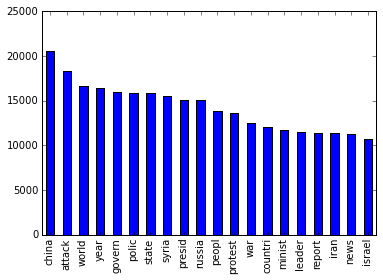

In [60]:
topic_counts[1:].head(20).plot(kind='bar')
